# Libraries and data loading

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from funcs import *
sns.set()

In [2]:
data = pd.read_csv('./data/kaggle_survey_2020_responses.csv', header=1)

In [3]:
data.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Trains","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning and Processing

Steps followed to process the data:
1. Filter the dataset by people who are (or soon to be) Data Scientist.
2. Extract how many years each participant have been using ML methods.
3. Divide the participants into 2 categories: neophytes (< 2yrs), experts (>7.5 yrs.). Other participants are filter out.
4. Then, each question in both dataframes is processed:
    1. If a question has been answered (it's vakue is not nan) it is appended to the output.
    2. Most of the questions and answers are renamed, to make the data visualization easier.

In [4]:
data_ds = data.loc[data['Select the title most similar to your current role (or most recent title if retired): - Selected Choice']=='Data Scientist'].copy()
experience = data_ds[['For how many years have you used machine learning methods?']]

In [5]:
cols_remap = {'For how many years have you used machine learning methods?':'yrs_ml'}
experience = experience.rename(columns=cols_remap).fillna('nan')

In [6]:
for c in list(experience.columns)[4:]:
    experience[c] = experience[c].apply(lambda x: 1 if x!='nan' else 0)
experience['yrs_ml'] = experience['yrs_ml'].apply(lambda x: map_yrs_ml(x))

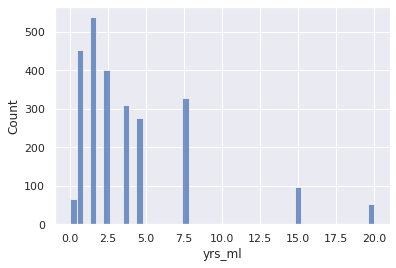

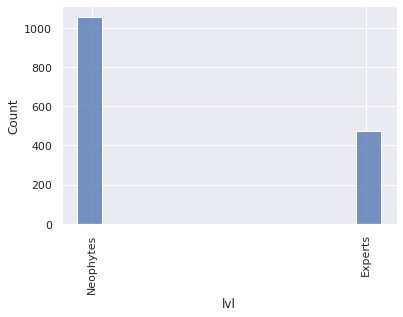

In [7]:
sns.histplot(experience['yrs_ml'])
plt.show()

def neophite_or_expert(x):
    if x < 2:
        return 0 # Neophyte
    if x > 7:
        return 1 # Expert
    return np.nan # Neither

experience['lvl'] = experience['yrs_ml'].apply(lambda x: neophite_or_expert(x))

sns.histplot(experience['lvl'])
plt.xticks([0.05,0.95], ['Neophytes', 'Experts'], rotation=90)
plt.show()

In [8]:
df_neophytes = data_ds.loc[experience['lvl'].values==0]
df_expert = data_ds.loc[experience['lvl'].values==1]
res_neophytes = process_dataframe(df_neophytes)
res_expert = process_dataframe(df_expert)

# Data Analysis

The analysis consists into comparing the difference of the relative frequencies for each answer between neophytes and experts.
The relative frequencies are calculated as the number of times that a particular answer is given over the total number of people that answer that question.
Then, the relative frequencies of neophytes and experts are substracted one from the other and the result is stored as an image in disk.

In [9]:
for k in res_neophytes.keys():
    generate_result_difference(k, res_neophytes, res_expert, experience)

# Visualization and Questions

Now that all the data has been properly clean and analize, it is time to visualize and answer the important questions,
The baseline for all the questions is how experts differ from people new to the field. Then, each question is focused to 
one specific part of the data science knowledge.

## Q1: Programming Languages

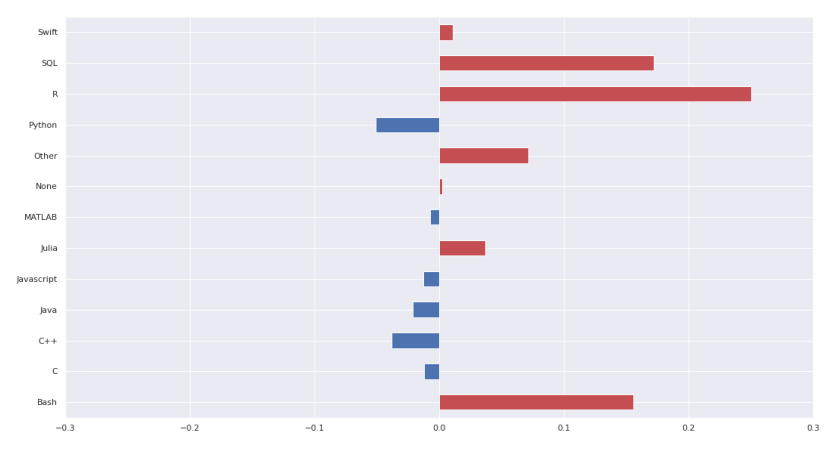

In [15]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./results/prog_lang.png'))
plt.axis('off')
plt.show()

## Q2: Data Science Stack

### Q2.1: Frameworks

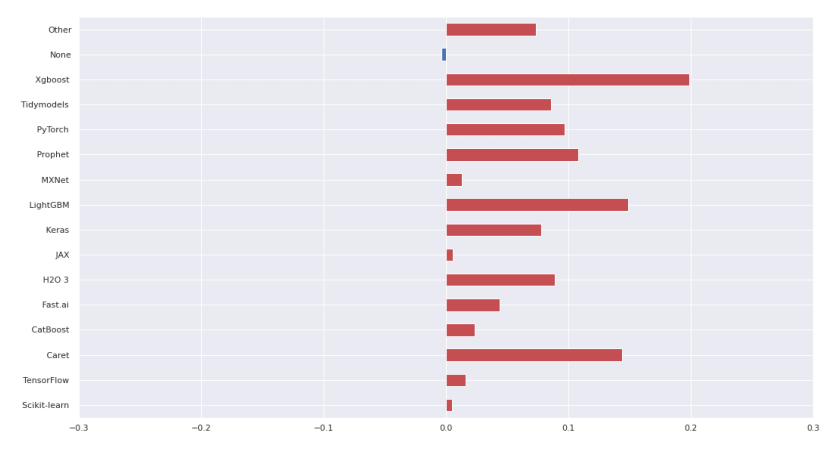

In [16]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./results/frameworks.png'))
plt.axis('off')
plt.show()

### Q2.2: Algortihms

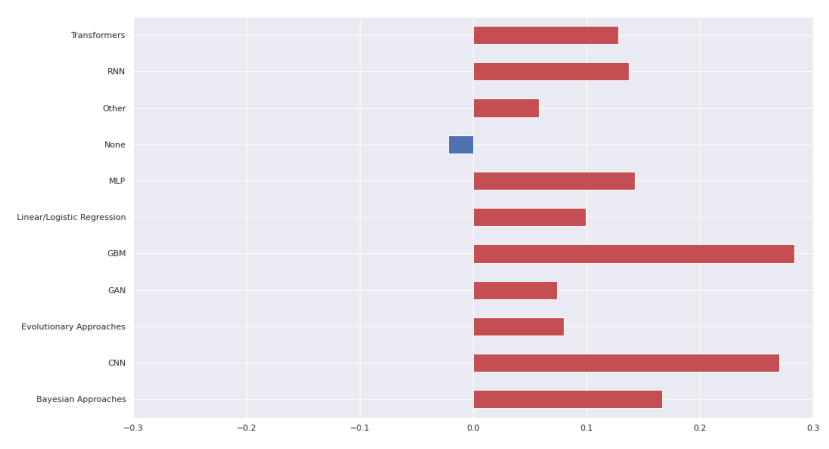

In [17]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./results/mlalgos.png'))
plt.axis('off')
plt.show()

### Q2.3: Visualization

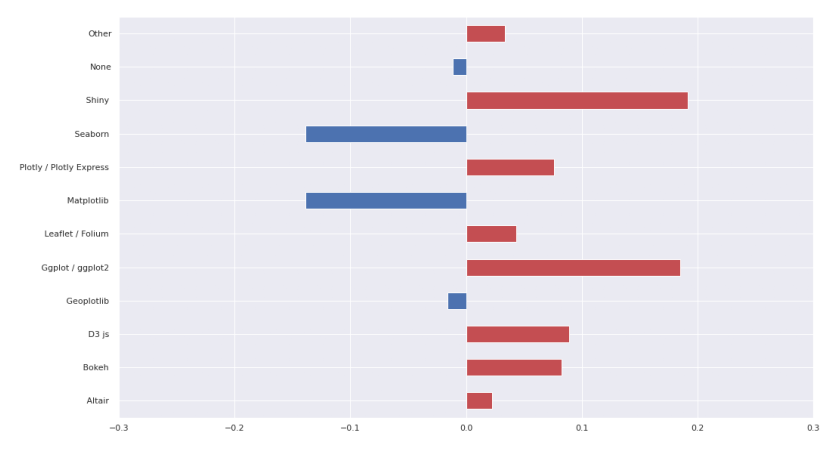

In [18]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./results/vis.png'))
plt.axis('off')
plt.show()

## Q3: Tools

### Q3.1: IDE

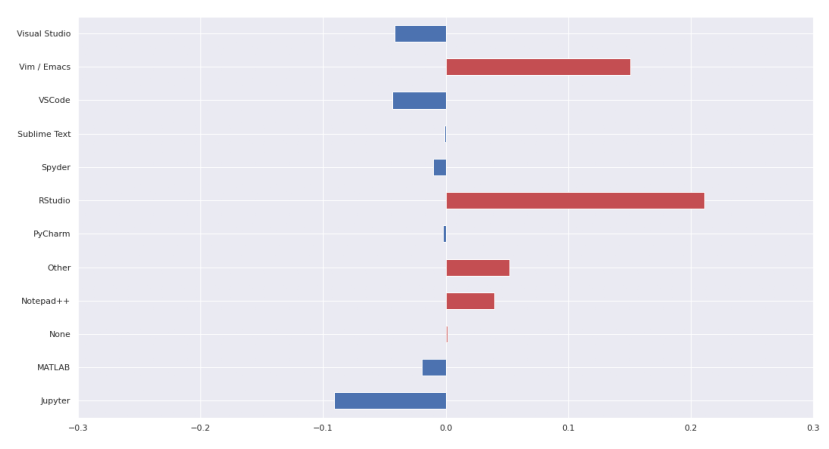

In [19]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./results/ide.png'))
plt.axis('off')
plt.show()

### Q3.2: AutoML

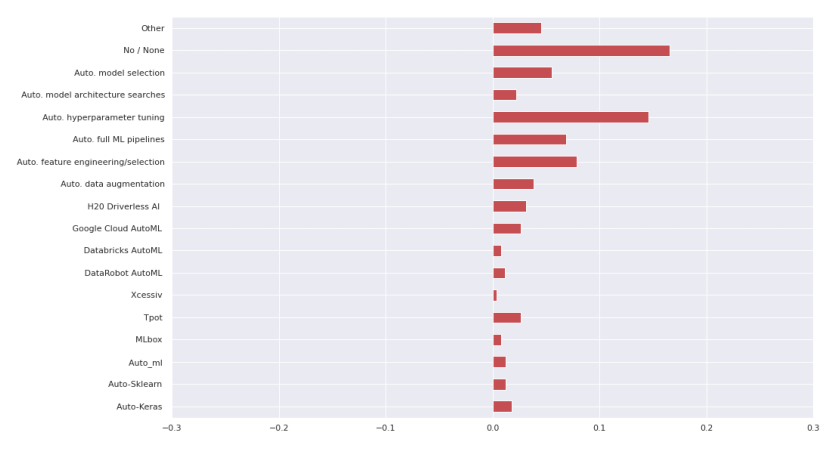

In [20]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./results/automl.png'))
plt.axis('off')
plt.show()

### Q3.3: Hosted notebooks

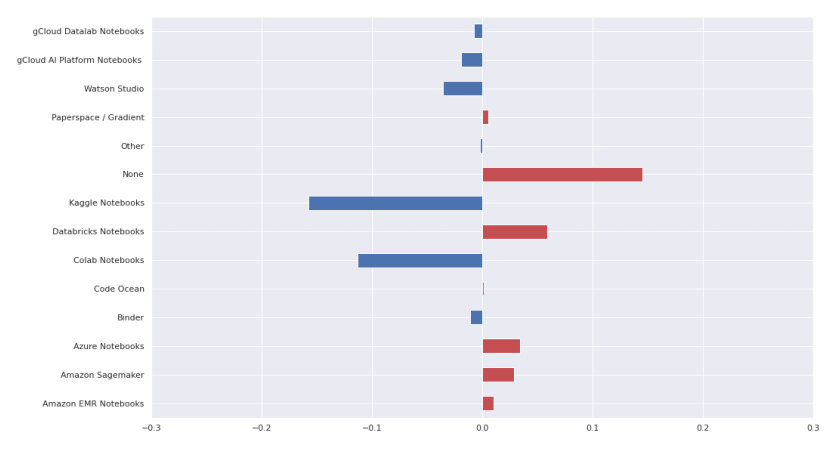

In [21]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./results/hosted.png'))
plt.axis('off')
plt.show()

### Q3.4: Manage ML

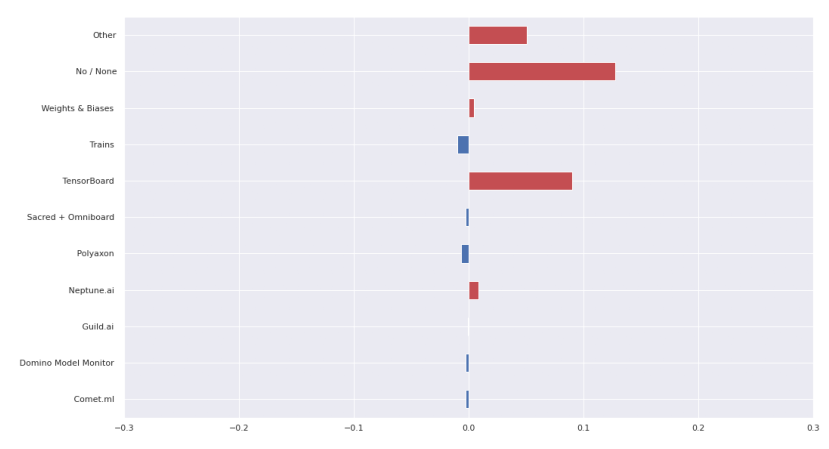

In [22]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./results/manage_ml.png'))
plt.axis('off')
plt.show()

## Q4: Platforms and Cloud computing

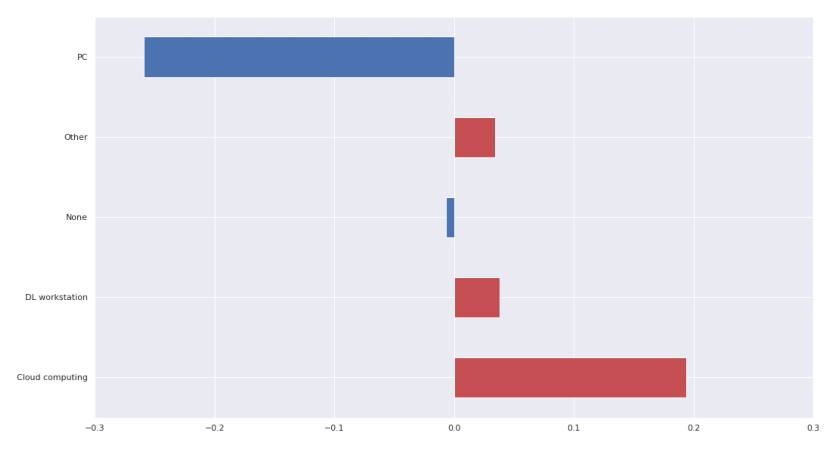

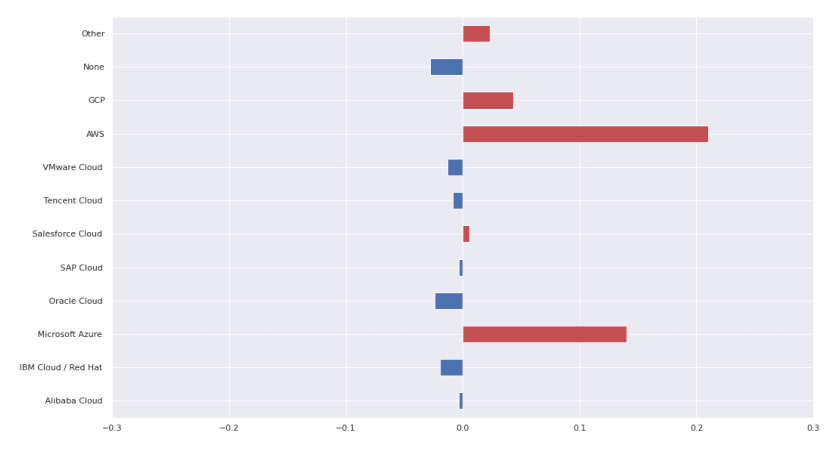

In [24]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./results/computing.png'))
plt.axis('off')
plt.show()

plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./results/cloud_platform.png'))
plt.axis('off')
plt.show()

## Q5: Knowledge sharing

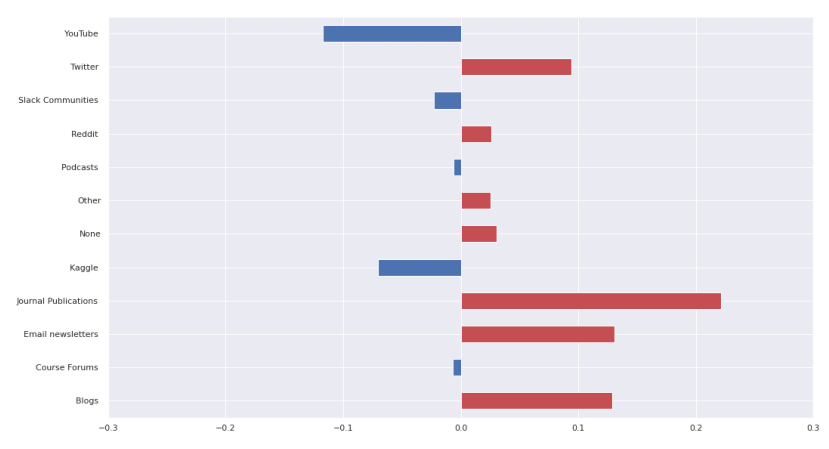

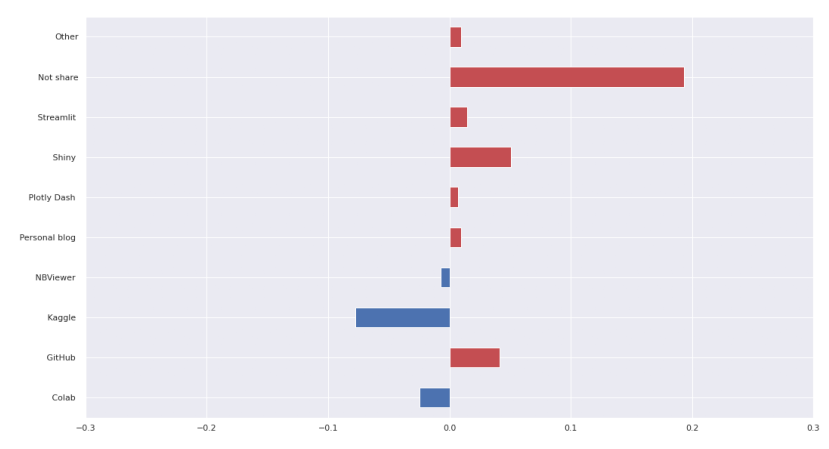

In [25]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./results/socialplatform.png'))
plt.axis('off')
plt.show()

plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./results/share.png'))
plt.axis('off')
plt.show()